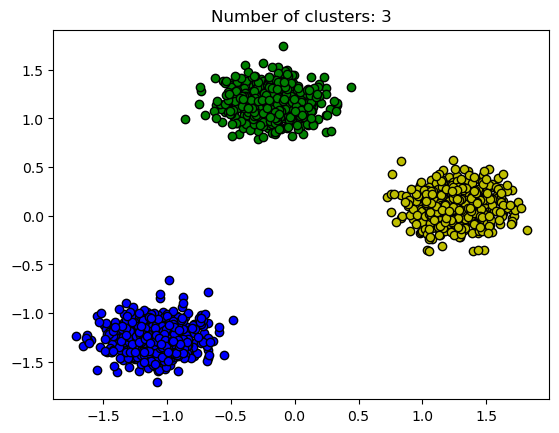

Silhouette Coefficient: 0.84
Adjusted Rand Index: 1.00


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

n_samples = 1500  # Generate sample data
n_features = 2
n_clusters = 3
X, y_true = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)

X = StandardScaler().fit_transform(X)  # Standardize features

db = DBSCAN(eps=0.3, min_samples=10).fit(X)    # Apply DBSCAN
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 

unique_labels = set(labels)   # Plot result
colors = ['y', 'b', 'g', 'r', 'c', 'm', 'k']  # Extend color list if needed

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = 'k'
    
    class_member_mask = (labels == k)
    
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)
    
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Number of clusters: %d' % n_clusters_)
plt.show()

# Evaluation metrics
if len(set(labels)) > 1:
    sc = metrics.silhouette_score(X, labels)
    print("Silhouette Coefficient: %0.2f" % sc)
else:
    print("Silhouette Coefficient cannot be computed as there is only one cluster.")

ari = metrics.adjusted_rand_score(y_true, labels)
print("Adjusted Rand Index: %0.2f" % ari)


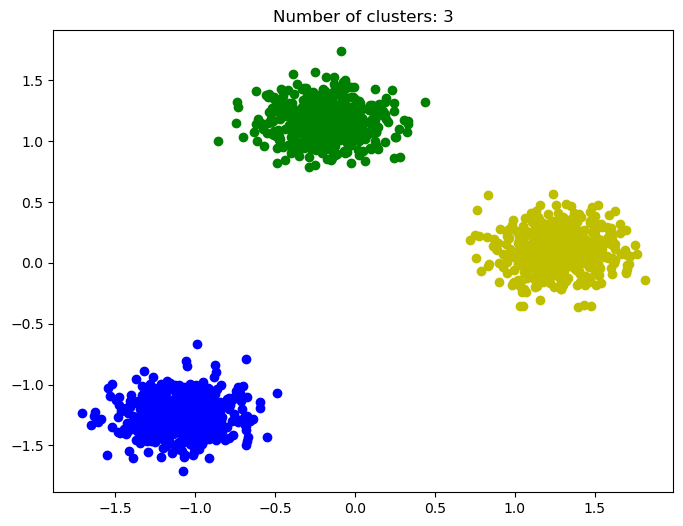

Silhouette Coefficient: 0.84
Adjusted Rand Index: 1.00


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate and standardize sample data
X, y_true = make_blobs(n_samples=1500, centers=3, random_state=42)
X = StandardScaler().fit_transform(X)

# Apply DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot results
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r', 'c', 'm', 'k']

for k, col in zip(unique_labels, colors):
    col = 'k' if k == -1 else col  # Noise in black
    class_member_mask = (labels == k)
    plt.plot(X[class_member_mask, 0], X[class_member_mask, 1], 'o', color=col, markersize=6)

plt.title(f'Number of clusters: {n_clusters_}')
plt.show()

# Evaluation metrics
if len(set(labels)) > 1:
    print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.2f}")
else:
    print("Silhouette Coefficient cannot be computed.")

print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y_true, labels):.2f}")
